# contents

## 0.1 Import libraries

In [23]:
from pathlib import Path
from collections import Counter, defaultdict
from itertools import combinations
from pprint import pprint as pp
import requests
import random

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import networkx as nx

print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version {mpl.__version__}')
print(f'networkx version {nx.__version__}')

numpy version: 1.19.0
pandas version: 1.0.5
matplotlib version 3.3.0
networkx version 2.5


## 0.2 function create_dir_save_file

In [22]:
def create_dir_save_file(dir_path: Path, url: str):
    """
    Check if the path exists and create it if it does not.
    Check if the file exists and download it if it does not.
    """
    if not dir_path.parents[0].exists():
        dir_path.parents[0].mkdir(parents=True)
        print(f'Directory Created: {dir_path.parents[0]}')
    else:
        print('Directory Exists')
        
    if not dir_path.exists():
        r = requests.get(url, allow_redirects=True)
        open(dir_path, 'wb').write(r.content)
        print(f'File Created: {dir_path.name}')
    else:
        print('File Exists')


 ## 0.3 load datasets

In [26]:
#datset url:

#https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p
#https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p

data_dir = Path('data/network')
images_dir = Path('image/network')

twitter = 'https://assets.datacamp.com/production/repositories/580/datasets/64cf6963a7e8005e3771ef3b256812a5797320f0/ego-twitter.p'
github = 'https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p'

datasets = [twitter, github]
data_paths = list()

for data in datasets:
    file_name = data.split('/')[-1].replace('?raw=true', '')
    data_path = data_dir / file_name
    create_dir_save_file(data_path, data)
    data_paths.append(data_path)

Directory Created: data/network
File Created: ego-twitter.p
Directory Exists
File Created: github_users.p


# 0.4 data

In [27]:
T = nx.read_gpickle(data_paths[0])
Gh = nx.read_gpickle(data_paths[1])


# 1 Inroduction

## 1.1 Graph

Graph are structures that map relations between objects. the objects are referred to as nodes and the connections between them as edges. Edges and Nodes are commonly referred to by several name such as 
node == vertex == point
edge == arc == link
the start graph is undirected. that is edges have no orientation. they are bi-directional.
for example: A <---------> B = B <----------> A
By contrast, the shortest path to hike every tail could be a directed graph 
for example: A -----> B != B -------> A

the distance between each pair of adjacent nodes represents of an edge.

Degree refers the number of edges incident to (touching) a node. Nodes are referred to as odd-degree nodes a number odd and even-degree when it is even.




## 1.2 NetworkX


Networkx is most popular python package for manipulating and analyzing graph. 
igraph for c++. 
Using nx.Graph(), we could initialize an empty graph to which we can add nodes and edges
the integer 1, 2, 3 can be entered as nodes, using the add_nodes_from method the list [1, 2, 3] as an argument.
Using the .nodes method to see the nodes present in the graph.
similarly use .add_edges and .edges to add and see the edges present in the graph.
Edges between nodes are represented as tuple, in which each tuple shows the nodes that are present on that edge


In [29]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
print(G.nodes())
G.add_edge(1,2)
print(G.edges())

[1, 2, 3]
[(1, 2)]


- metadata can be stored on the graph as well
- For example, we can add to the node 1 , a label key with blue, as we assign a value to the key of dictionary
- the node list can be retrieved with G.nodes() and passing the (data = True) parameter.
    -  this returns a list of tuples in which the first element of each tuple is the node and the second element is a dictionary in which the key-value pair corresponds to the metadata. 

In [32]:
G.nodes[1]['label'] = 'blue'
G.nodes(data = True)

NodeDataView({1: {'label': 'blue'}, 2: {}, 3: {}})

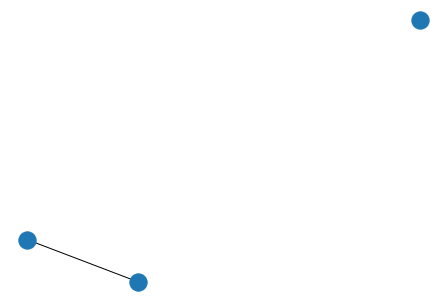

In [33]:
nx.draw(G)
plt.show()

In [35]:
print(len(T))
print(type(T.nodes()))
print(list(T.edges(data=True))[-1])
print(type(list(T.edges(data = True))[-1][2]))

23369
<class 'networkx.classes.reportviews.NodeView'>
(23324, 23336, {'date': datetime.date(2010, 9, 20)})
<class 'dict'>


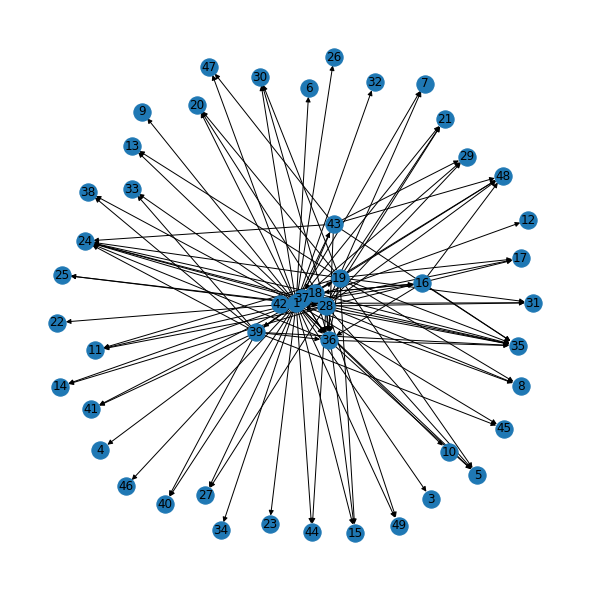

In [36]:
T_sub = nx.DiGraph()
edges_from_T = [x for x in T.edges(list(range(50)), data = True) 
                if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 4, 5] if x[1] < 50 ]
T_sub.add_edges_from(edges_from_T)
plt.figure(figsize = (8,8))
nx.draw(T_sub, with_labels = True)
plt.show()

## 1.3 Queries on a graph

- .nodes() method returns a list of nodes while the .edges() method returns a list of tuples in which each tuple shows the nodes that are present on that edge.  
- (data = true) keyword argument in these methods retrieves the corresponding metadata associated with the nodes and edges.
- list comprehensions to effectively build these queries in one line.

[ output expression for iterator variable in iterable if predicte expression]

In [37]:
# use a list comprehension on to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data = True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u,v) for u, v, d in T.edges(data = True) if d['date'].year < 2010]


print(noi[:10])
print(eoi[:10])

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


## 1.4 Types of Graphs

1. Undirected graphs
    - Facebook
    - They are comprised of edges that don't have any inherent directionality associated with them.
    - With Facebook, for example when one user befriends another, the two are automatically connected with an edge.
    - This is commonly drawn as a line with no arrows between two circles.
    - Undirected graphs have the type Graph

In [38]:
G = nx.Graph()
type(G)

networkx.classes.graph.Graph

  Directed graphs
-Twitter
- This is because of the nature of how users interact with one another
- For example, one user may follow another, but that other user may not follow
- As such, there's an inherent directionality associated with the graph
- Directed graphs have the type DiGraph

In [39]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

Multi-edge (Directed) graphs
- Graph in which there are multiple edges permitted between the nodes
- For example we may want to model trips between bike sharing stations
- Each trip may be one edge between in